In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
!pip install numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 112.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.13.0 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you

In [ ]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 33.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting 

In [ ]:
import tensorflow as tf
import keras
import zipfile
from google.colab import drive
import glob
from PIL import Image
import os
import pygad
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import json
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Class distribution:
label
0    3500
1    3500
2    3500
3    3500
Name: count, dtype: int64
Training SVM model for 4-class classification...
Validation Accuracy: 0.8875
Accuracy: 0.8757

Classification Report:
              precision    recall  f1-score   support

   addisplay     0.9057    0.9057    0.9057       700
      benign     0.8832    0.8857    0.8845       700
    riskware     0.8174    0.8571    0.8368       700
         spr     0.9006    0.8543    0.8768       700

    accuracy                         0.8757      2800
   macro avg     0.8767    0.8757    0.8760      2800
weighted avg     0.8767    0.8757    0.8760      2800

Confusion matrix saved to /content/drive/My Drive/svm_4_confusion_matrix_t500_new.png


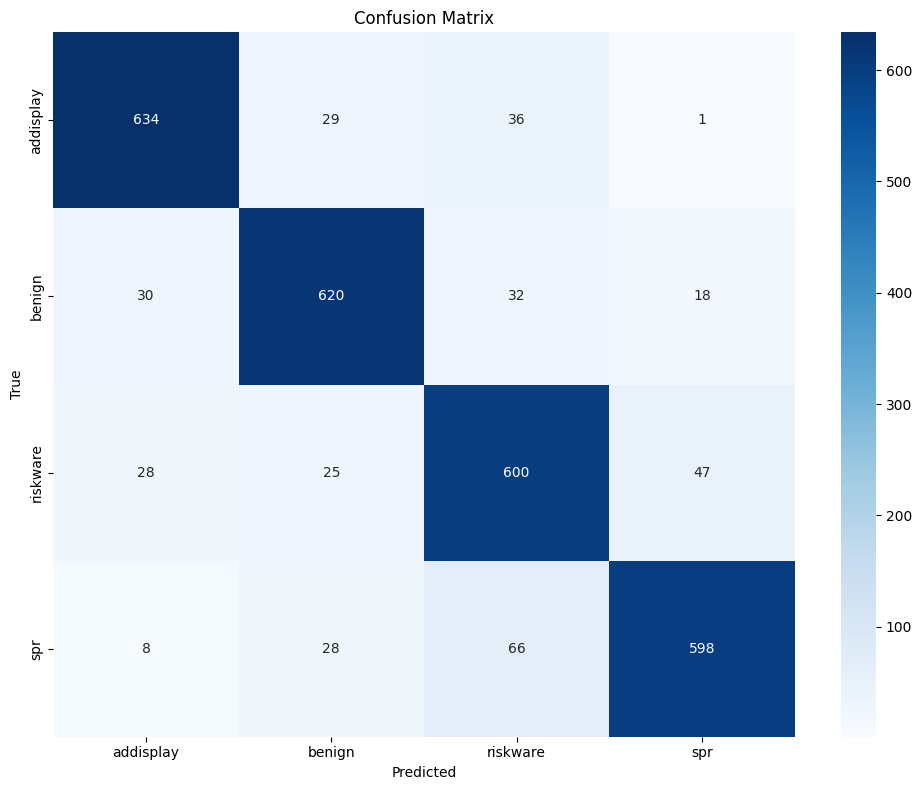

In [ ]:
# SVM

base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Prepare the data
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Display class distribution
print("Class distribution:")
print(df['label'].value_counts())

# Chia dữ liệu: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Từ train_val tiếp tục chia 20% làm validation (~16% toàn bộ)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(
    kernel='rbf',
    C=10.0,
    gamma='auto',
    probability=True,
    class_weight='balanced',
    random_state=42
)
print("Training SVM model for 4-class classification...")
svm_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= ['addisplay', 'benign', 'riskware', 'spr'], digits=4))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
categories = ['addisplay', 'benign', 'riskware', 'spr']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Save confusion matrix
cm_path = os.path.join(base_dir, "svm_4_confusion_matrix_t500_new.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")


Class distribution:
label
0    3500
1    3500
2    3500
3    3500
Name: count, dtype: int64
Training Random Forest model for 4-class classification...
Validation Accuracy: 0.8304
Accuracy: 0.8232

Classification Report:
              precision    recall  f1-score   support

   addisplay     0.8661    0.8314    0.8484       700
      benign     0.7784    0.9286    0.8469       700
    riskware     0.7669    0.7757    0.7713       700
         spr     0.9060    0.7571    0.8249       700

    accuracy                         0.8232      2800
   macro avg     0.8294    0.8232    0.8229      2800
weighted avg     0.8294    0.8232    0.8229      2800

Confusion matrix saved to /content/drive/My Drive/RF_4_confusion_matrix_t500.png


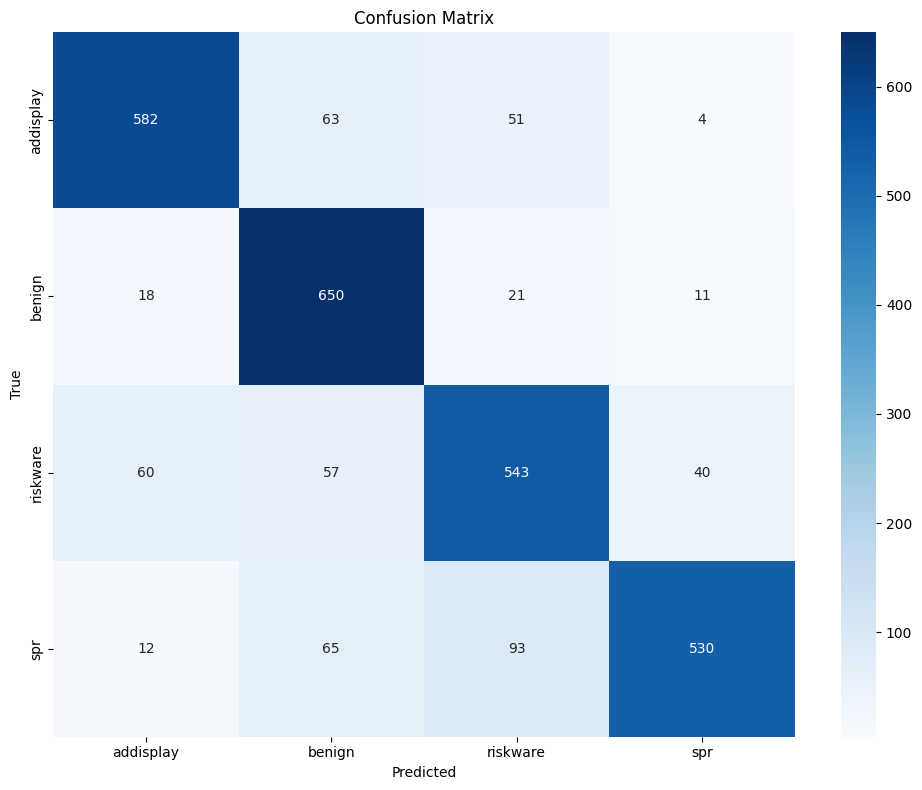

In [ ]:
# Random Forest

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = '/content/drive/My Drive/combined_static_features_4_top500.csv'
df = pd.read_csv(csv_path)

# Prepare the data
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Display class distribution
print("Class distribution:")
print(df['label'].value_counts())

# Split into train_val (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# From train_val split 20% for validation (so ~64% train, 16% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
# Train the Random Forest model
model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
print("Training Random Forest model for 4-class classification...")
model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
class_names = ['addisplay', 'benign', 'riskware', 'spr']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= class_names, digits=4))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Save confusion matrix
cm_path = os.path.join(base_dir, "RF_4_confusion_matrix_t500.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")

Train: 8960, Validation: 2240, Test: 2800

----- Training MLP Model -----


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5176 - loss: 1.2012 - val_accuracy: 0.8304 - val_loss: 0.4803
Epoch 2/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8175 - loss: 0.5267 - val_accuracy: 0.8527 - val_loss: 0.4072
Epoch 3/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.4068 - val_accuracy: 0.8670 - val_loss: 0.3932
Epoch 4/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.3583 - val_accuracy: 0.8687 - val_loss: 0.3818
Epoch 5/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.3256 - val_accuracy: 0.8741 - val_loss: 0.3800
Epoch 6/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.3012 - val_accuracy: 0.8777 - val_loss: 0.3595
Epoch 7/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9019 - loss: 0.2894 - val_accuracy: 0.8795 - val_loss: 0.3772
Epoch 8/45
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9079 - loss: 0.2733 - val_accuracy: 0.

Confusion matrix saved to /content/drive/My Drive/confusion_matrix_mlp_t500_4_new.png
Model saved to /content/drive/My Drive/MLP_4_output_t500_new.h5
Training history saved to /content/drive/My Drive/training_history_MLP_t500_4_new.png


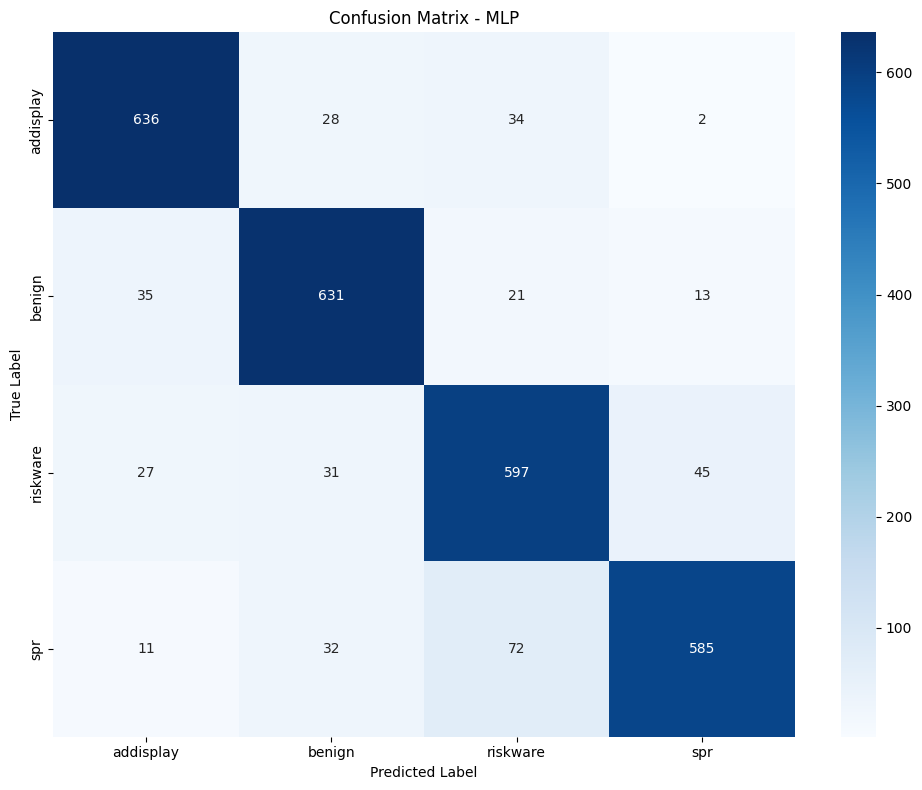

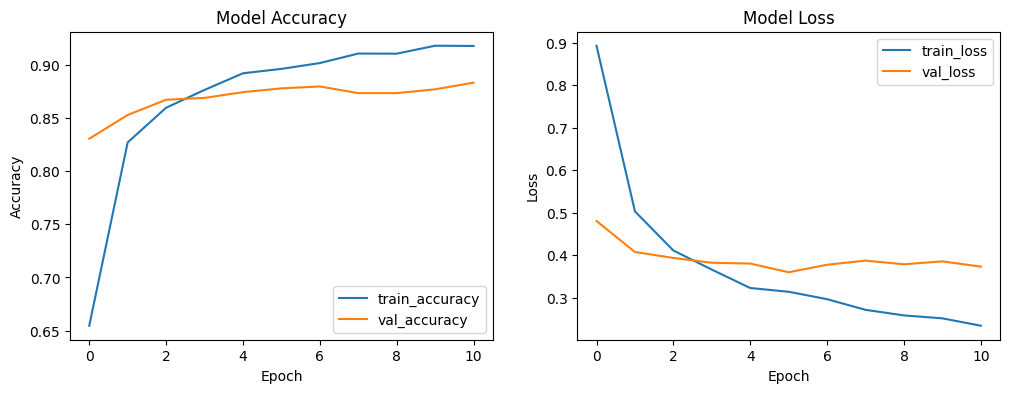

In [ ]:
# MLP

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Split data: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# From train_val split 20% for validation (16% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

print(f"Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")
# Initialize scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def train_neural_network():
    print("\n----- Training MLP Model -----")

    # One-hot encode labels
    y_train_cat = keras.utils.to_categorical(y_train, num_classes=4)
    y_val_cat = keras.utils.to_categorical(y_val, num_classes=4)
    y_test_cat = keras.utils.to_categorical(y_test, num_classes=4)

    # Create model
    input_dim = X_train.shape[1]
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_dim=input_dim),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train
    history = model.fit(
        X_train_scaled, y_train_cat,
        validation_data=(X_val_scaled, y_val_cat),
        epochs=45,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Evaluate
    loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Predictions and classification report
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)
    class_names = ['addisplay', 'benign', 'riskware', 'spr']

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names= class_names, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot Confusion Matrix using Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - MLP')
    plt.tight_layout()

    # Save confusion matrix
    cm_path = os.path.join(base_dir, "confusion_matrix_mlp_t500_4_new.png")
    plt.savefig(cm_path)
    print(f"Confusion matrix saved to {cm_path}")

    # Save model (use Keras save, not pickle)
    model_path = os.path.join(base_dir, "MLP_4_output_t500_new.h5")
    model.save(model_path)
    print(f"Model saved to {model_path}")

    return model, accuracy, history

nn_model, nn_accuracy, nn_history = train_neural_network()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'], label='train_accuracy')
plt.plot(nn_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'], label='train_loss')
plt.plot(nn_history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save training history plot
history_path = os.path.join(base_dir, "training_history_MLP_t500_4_new.png")
plt.savefig(history_path)
print(f"Training history saved to {history_path}")

Training samples: 8960, Test samples: 2800

===== Starting Genetic Algorithm for Neural Network Optimization =====
Starting Genetic Algorithm optimization for neural network...

Generation 1/15
Evaluating chromosome 1/20...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chromosome: {'num_layers': 5, 'neurons': [512, 512, 64, 1024, 64, 1024], 'dropout_rates': [0.3617945927298591, 0.3223374889549796, 0.5181530194863905, 0.5184468602988708, 0.5133436984881892, 0.5677605623293472], 'learning_rate': 0.0005, 'batch_size': 32}
Fitness (accuracy): 0.8826
Evaluating chromosome 2/20...
Chromosome: {'num_layers': 5, 'neurons': [128, 1024, 512, 512, 64, 512], 'dropout_rates': [0.5949255589669593, 0.5765531308331231, 0.49452937574827927, 0.27691935264548073, 0.549708485164998, 0.28527578549379523], 'learning_rate': 0.0005, 'batch_size': 32}
Fitness (accuracy): 0.8799
Evaluating chromosome 3/20...
Chromosome: {'num_layers': 4, 'neurons': [1024, 256, 512, 64, 512, 512], 'dropout_rates': [0.43631296754040905, 0.30389005433654515, 0.3477687668650046, 0.4832627932099051, 0.21886546124102293, 0.5328861828765066], 'learning_rate': 0.01, 'batch_size': 32}
Fitness (accuracy): 0.8839
Evaluating chromosome 4/20...
Chromosome: {'num_layers': 4, 'neurons': [128, 64, 128, 256, 

Confusion matrix saved to /content/drive/My Drive/confusion_matrix_ga_mlp_4output_t500_final.png
Model saved to /content/drive/My Drive/GA_MLP_4_output_t500_final.h5
Scaler saved to /content/drive/My Drive/GA_MLP_4_output_scaler_t500_new.pkl

===== Genetic Algorithm Neural Network Training Complete =====


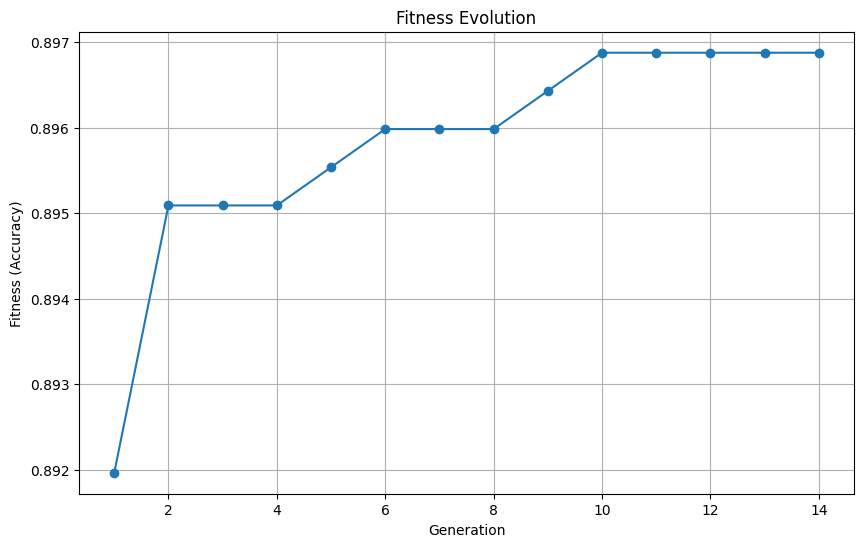

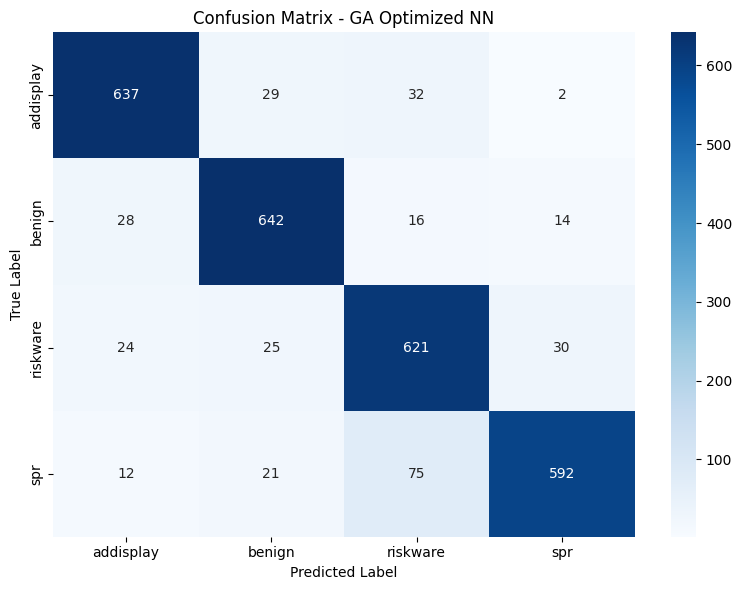

In [ ]:
# GA-MLP

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Split: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# From train_val split 20% for validation => 64% train, 16% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=4)
y_val_categorical = keras.utils.to_categorical(y_val, num_classes=4)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=4)

class GeneticAlgorithm:
    def __init__(self, population_size=30, generations=15, mutation_rate=0.3, elite_size=4):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
        self.chromosome_history = []
        self.fitness_history = []
        self.best_fitness = 0
        self.best_chromosome = None
        self.best_model = None
        self.best_history = None

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = {
                'num_layers': random.randint(3, 6),
                'neurons': [random.choice([64, 128, 256, 512, 1024]) for _ in range(6)],
                'dropout_rates': [random.uniform(0.2, 0.6) for _ in range(6)],
                'learning_rate': random.choice([0.0001, 0.0005, 0.001, 0.005, 0.01]),
                'batch_size': random.choice([32, 64, 128, 256])
            }
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome, verbose=0):
        num_layers = chromosome['num_layers']
        neurons = chromosome['neurons']
        dropout_rates = chromosome['dropout_rates']
        learning_rate = chromosome['learning_rate']
        batch_size = chromosome['batch_size']

        model = keras.Sequential()
        input_dim = X_train.shape[1]
        model.add(keras.layers.Dense(neurons[0], activation='relu', input_dim=input_dim))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rates[0]))

        for i in range(1, num_layers):
            model.add(keras.layers.Dense(neurons[i], activation='relu'))
            model.add(keras.layers.BatchNormalization())
            model.add(keras.layers.Dropout(dropout_rates[i]))

        model.add(keras.layers.Dense(4, activation='softmax'))  # 4 output classes

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True
        )

        history = model.fit(
            X_train_scaled, y_train_categorical,
            validation_data=(X_val_scaled, y_val_categorical),
            epochs=30,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=verbose
        )

        _, accuracy = model.evaluate(X_val_scaled, y_val_categorical, verbose=0)
        return accuracy, model, history

    def select_parents(self, population, fitnesses):
        selected_parents = []
        elite_indices = np.argsort(fitnesses)[-self.elite_size:]
        for idx in elite_indices:
            selected_parents.append(population[idx])
        while len(selected_parents) < self.population_size:
            tournament_size = 3
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
            winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
            selected_parents.append(population[winner_idx])
        return selected_parents

    def crossover(self, parents):
        offspring = []
        offspring.extend(parents[:self.elite_size])
        while len(offspring) < self.population_size:
            parent1, parent2 = random.sample(parents, 2)
            child = {
                'num_layers': parent1['num_layers'] if random.random() < 0.5 else parent2['num_layers'],
                'neurons': [parent1['neurons'][i] if random.random() < 0.5 else parent2['neurons'][i] for i in range(6)],
                'dropout_rates': [parent1['dropout_rates'][i] if random.random() < 0.5 else parent2['dropout_rates'][i] for i in range(6)],
                'learning_rate': parent1['learning_rate'] if random.random() < 0.5 else parent2['learning_rate'],
                'batch_size': parent1['batch_size'] if random.random() < 0.5 else parent2['batch_size']
            }
            offspring.append(child)
        return offspring

    def mutate(self, offspring):
        for i in range(self.elite_size, len(offspring)):
            if random.random() < self.mutation_rate:
                param = random.choice(['num_layers', 'neurons', 'dropout_rates', 'learning_rate', 'batch_size'])
                if param == 'num_layers':
                    offspring[i]['num_layers'] = random.randint(3, 6)
                elif param == 'neurons':
                    idx = random.randint(0, 5)
                    offspring[i]['neurons'][idx] = random.choice([64, 128, 256, 512, 1024])
                elif param == 'dropout_rates':
                    idx = random.randint(0, 5)
                    offspring[i]['dropout_rates'][idx] = random.uniform(0.2, 0.6)
                elif param == 'learning_rate':
                    offspring[i]['learning_rate'] = random.choice([0.0001, 0.0005, 0.001, 0.005, 0.01])
                elif param == 'batch_size':
                    offspring[i]['batch_size'] = random.choice([32, 64, 128, 256])
        return offspring

    def run(self):
        print("Starting Genetic Algorithm optimization for neural network...")
        population = self.create_initial_population()
        generations_without_improvement = 0
        max_stagnation = 5 #Số thế hệ tối đa không cải thiện
        for generation in range(self.generations):
            print(f"\nGeneration {generation+1}/{self.generations}")
            fitnesses = []
            models = []
            histories = []
            for i, chromosome in enumerate(population):
                print(f"Evaluating chromosome {i+1}/{len(population)}...")
                fitness, model, history = self.calculate_fitness(chromosome)
                fitnesses.append(fitness)
                models.append(model)
                histories.append(history)
                print(f"Chromosome: {chromosome}\nFitness (accuracy): {fitness:.4f}")
            best_idx = np.argmax(fitnesses)
            current_best_fitness = fitnesses[best_idx]
            current_best_chromosome = population[best_idx]
            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_chromosome = current_best_chromosome
                self.best_model = models[best_idx]
                self.best_history = histories[best_idx]
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1
            if generations_without_improvement >= max_stagnation:
                print(f"No improvement in {max_stagnation} generations. Stopping optimization.")
                break

            self.chromosome_history.append(self.best_chromosome)
            self.fitness_history.append(self.best_fitness)
            print(f"Generation {generation+1} best fitness: {current_best_fitness:.4f}")
            print(f"Overall best fitness: {self.best_fitness:.4f}")
            parents = self.select_parents(population, fitnesses)
            offspring = self.crossover(parents)
            population = self.mutate(offspring)
        print("\nGenetic Algorithm completed!")
        print(f"Best chromosome: {self.best_chromosome}")
        print(f"Best fitness (accuracy): {self.best_fitness:.4f}")
        return self.best_chromosome, self.best_fitness, self.best_model

    def plot_fitness_evolution(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.fitness_history) + 1), self.fitness_history, marker='o')
        plt.title('Fitness Evolution')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Accuracy)')
        plt.grid(True)
        evolution_path = os.path.join(base_dir, "ga_fitness_evolution_stronger_config.png")
        plt.savefig(evolution_path)
        print(f"Fitness evolution plot saved to {evolution_path}")

print("\n===== Starting Genetic Algorithm for Neural Network Optimization =====")
ga = GeneticAlgorithm(population_size=20, generations=15, mutation_rate=0.3, elite_size=4)
best_chromosome, best_fitness, best_model_ga = ga.run()
ga.plot_fitness_evolution()

# Evaluate model
loss, accuracy = best_model_ga.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict and get labels
y_pred_prob = best_model_ga.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification report
class_names = ['addisplay', 'benign', 'riskware', 'spr']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix with tick labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - GA Optimized NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
cm_path = os.path.join(base_dir, "confusion_matrix_ga_mlp_4output_t500_final.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")

model_path = os.path.join(base_dir, "GA_MLP_4_output_t500_final.h5")
best_model_ga.save(model_path)
print(f"Model saved to {model_path}")

# Save scaler for inference
scaler_path = os.path.join(base_dir, "GA_MLP_4_output_scaler_t500_new.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

best_config = {
    'best_chromosome': best_chromosome,
    'best_fitness': best_fitness,
    'final_accuracy': float(accuracy)
}
with open(os.path.join(base_dir, "ga_best_configuration_4output_t500.json"), 'w') as f:
    json.dump(best_config, f, indent=4)

print("\n===== Genetic Algorithm Neural Network Training Complete =====")

Training samples: 8960, Test samples: 2800
Data reshaped for Conv1D: (8960, 2021, 1)
Data reshaped for Conv2D: (8960, 45, 45, 1)

===== Starting Genetic Algorithm for CONV1D Neural Network =====
Starting Genetic Algorithm optimization for CONV1D neural network...

Generation 1/15
Evaluating chromosome 1/15...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fitness (accuracy): 0.8638
Evaluating chromosome 2/15...
Fitness (accuracy): 0.8473
Evaluating chromosome 3/15...
Fitness (accuracy): 0.8754
Evaluating chromosome 4/15...
Fitness (accuracy): 0.8509
Evaluating chromosome 5/15...
Fitness (accuracy): 0.8683
Evaluating chromosome 6/15...
Fitness (accuracy): 0.8254
Evaluating chromosome 7/15...
Fitness (accuracy): 0.8482
Evaluating chromosome 8/15...
Fitness (accuracy): 0.8580
Evaluating chromosome 9/15...
Fitness (accuracy): 0.8576
Evaluating chromosome 10/15...
Fitness (accuracy): 0.8304
Evaluating chromosome 11/15...
Fitness (accuracy): 0.6277
Evaluating chromosome 12/15...
Fitness (accuracy): 0.8902
Evaluating chromosome 13/15...
Fitness (accuracy): 0.6571
Evaluating chromosome 14/15...
Fitness (accuracy): 0.8821
Evaluating chromosome 15/15...
Fitness (accuracy): 0.8786
Generation 1 best fitness: 0.8902
Overall best fitness: 0.8902

Generation 2/15
Evaluating chromosome 1/15...
Fitness (accuracy): 0.8826
Evaluating chromosome 2/15...
Fi

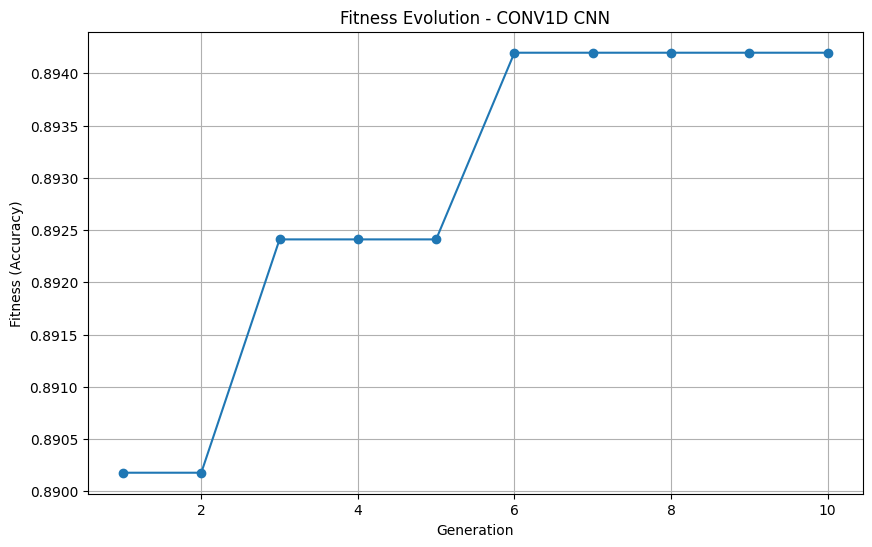

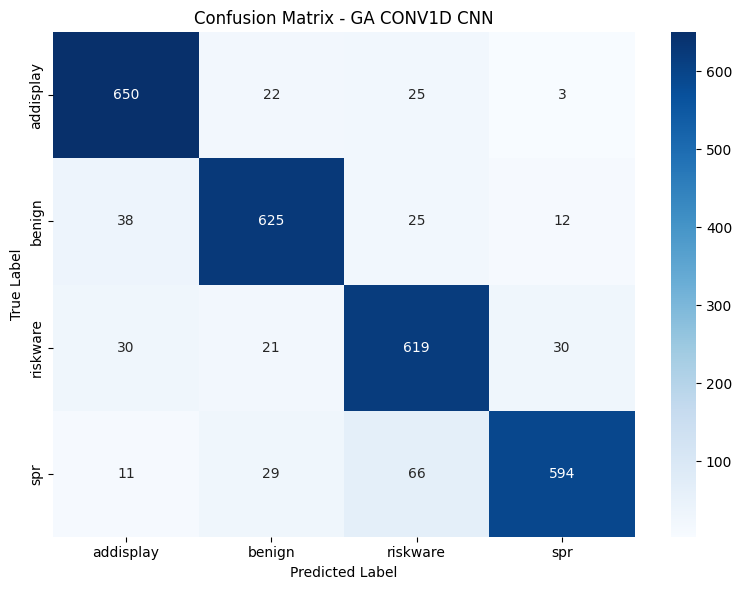

In [ ]:
#GA-CNN
import tensorflow as tf
import keras
from keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout
import zipfile
from google.colab import drive
import glob
from PIL import Image
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import random
import time
import math

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Split: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# From train_val split 20% for validation => 64% train, 16% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=4)
y_val_categorical = keras.utils.to_categorical(y_val, num_classes=4)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=4)

# Reshape data for CNN
# Tính kích thước phù hợp cho dữ liệu để biến đổi thành 2D
num_features = X_train_scaled.shape[1]  # 500 features
side_length = int(math.sqrt(num_features))
remaining = num_features - (side_length * side_length)

# Reshape cho Conv1D
X_train_1d = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_1d = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_1d = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Reshape cho Conv2D (biến 500 features thành ma trận 2D)
if remaining > 0:
    # Thêm padding để có ma trận vuông
    padding_size = (side_length + 1) * (side_length + 1) - num_features
    X_train_padded = np.pad(X_train_scaled, ((0, 0), (0, padding_size)), 'constant')
    X_val_padded = np.pad(X_val_scaled, ((0, 0), (0, padding_size)), 'constant')
    X_test_padded = np.pad(X_test_scaled, ((0, 0), (0, padding_size)), 'constant')

    side_length += 1
else:
    X_train_padded = X_train_scaled
    X_val_padded = X_val_scaled
    X_test_padded = X_test_scaled

# Reshape thành ma trận 2D
X_train_2d = X_train_padded.reshape(X_train_padded.shape[0], side_length, side_length, 1)
X_val_2d = X_val_padded.reshape(X_val_padded.shape[0], side_length, side_length, 1)
X_test_2d = X_test_padded.reshape(X_test_padded.shape[0], side_length, side_length, 1)

print(f"Data reshaped for Conv1D: {X_train_1d.shape}")
print(f"Data reshaped for Conv2D: {X_train_2d.shape}")

class GeneticAlgorithmCNN:
    def __init__(self, population_size=20, generations=15, mutation_rate=0.3, elite_size=4,
                 cnn_type="conv1d"):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
        self.cnn_type = cnn_type  # "conv1d" hoặc "conv2d"
        self.chromosome_history = []
        self.fitness_history = []
        self.best_fitness = 0
        self.best_chromosome = None
        self.best_model = None
        self.best_history = None

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = {
                'conv_layers': random.randint(2, 4),  # Số lượng lớp tích chập
                'filters': [random.choice([16, 32, 64, 128]) for _ in range(4)],  # Số bộ lọc cho mỗi lớp Conv
                'kernel_sizes': [random.choice([3, 5, 7]) for _ in range(4)],  # Kích thước kernel
                'pool_sizes': [random.choice([2, 3]) for _ in range(4)],  # Kích thước pooling
                'fc_layers': random.randint(1, 3),  # Số lớp fully connected sau CNN
                'fc_neurons': [random.choice([64, 128, 256, 512]) for _ in range(3)],  # Số neuron trong mỗi lớp FC
                'dropout_rates': [random.uniform(0.2, 0.5) for _ in range(7)],  # Dropout cho tất cả các lớp
                'learning_rate': random.choice([0.0001, 0.0005, 0.001, 0.005]),
                'batch_size': random.choice([32, 64, 128])
            }
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome, verbose=0):
        # Trích xuất thông số từ chromosome
        conv_layers = chromosome['conv_layers']
        filters = chromosome['filters']
        kernel_sizes = chromosome['kernel_sizes']
        pool_sizes = chromosome['pool_sizes']
        fc_layers = chromosome['fc_layers']
        fc_neurons = chromosome['fc_neurons']
        dropout_rates = chromosome['dropout_rates']
        learning_rate = chromosome['learning_rate']
        batch_size = chromosome['batch_size']

        # Xây dựng mô hình CNN
        model = keras.Sequential()

        # Lớp đầu vào & layers tích chập
        if self.cnn_type == "conv1d":
            # Sử dụng Conv1D cho dữ liệu đặc trưng
            input_shape = (X_train_1d.shape[1], 1)  # (500, 1)
            model.add(Conv1D(filters=filters[0], kernel_size=kernel_sizes[0],
                            activation='relu', input_shape=input_shape, padding='same'))
            model.add(BatchNormalization())
            model.add(MaxPooling1D(pool_size=pool_sizes[0]))
            model.add(Dropout(dropout_rates[0]))

            # Thêm các lớp tích chập khác
            for i in range(1, conv_layers):
                model.add(Conv1D(filters=filters[i], kernel_size=kernel_sizes[i],
                               activation='relu', padding='same'))
                model.add(BatchNormalization())
                model.add(MaxPooling1D(pool_size=pool_sizes[i]))
                model.add(Dropout(dropout_rates[i]))

        else:  # conv2d
            # Sử dụng Conv2D cho dữ liệu đã reshape
            input_shape = X_train_2d.shape[1:]  # (side_length, side_length, 1)
            model.add(Conv2D(filters=filters[0], kernel_size=kernel_sizes[0],
                            activation='relu', input_shape=input_shape, padding='same'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D(pool_size=(pool_sizes[0], pool_sizes[0])))
            model.add(Dropout(dropout_rates[0]))

            # Thêm các lớp tích chập khác
            for i in range(1, conv_layers):
                model.add(Conv2D(filters=filters[i], kernel_size=kernel_sizes[i],
                               activation='relu', padding='same'))
                model.add(BatchNormalization())
                model.add(MaxPooling2D(pool_size=(pool_sizes[i], pool_sizes[i])))
                model.add(Dropout(dropout_rates[i]))

        # Chuyển đổi từ feature maps sang fully connected
        model.add(Flatten())

        # Thêm các lớp fully connected
        for i in range(fc_layers):
            model.add(Dense(fc_neurons[i], activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(dropout_rates[conv_layers + i]))

        # Lớp đầu ra
        model.add(Dense(4, activation='softmax'))

        # Biên dịch mô hình
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Early stopping để tránh overfit
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=3,
            restore_best_weights=True
        )

        # Huấn luyện mô hình
        if self.cnn_type == "conv1d":
            X_train_cnn = X_train_1d
            X_val_cnn = X_val_1d
        else:
            X_train_cnn = X_train_2d
            X_val_cnn = X_val_2d

        history = model.fit(
            X_train_cnn, y_train_categorical,
            validation_data=(X_val_cnn, y_val_categorical),
            epochs=20,  # Giảm epochs so với MLP vì CNN phức tạp hơn
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=verbose
        )

        # Đánh giá mô hình trên tập validation
        _, accuracy = model.evaluate(X_val_cnn, y_val_categorical, verbose=0)
        return accuracy, model, history

    def select_parents(self, population, fitnesses):
        selected_parents = []
        elite_indices = np.argsort(fitnesses)[-self.elite_size:]
        for idx in elite_indices:
            selected_parents.append(population[idx])

        # Lựa chọn bằng giải đấu (tournament selection)
        while len(selected_parents) < self.population_size:
            tournament_size = 3
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
            winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
            selected_parents.append(population[winner_idx])
        return selected_parents

    def crossover(self, parents):
        offspring = []
        # Giữ nguyên các elites
        offspring.extend(parents[:self.elite_size])

        # Lai ghép để tạo con mới
        while len(offspring) < self.population_size:
            parent1, parent2 = random.sample(parents, 2)

            child = {}
            # Lai ghép các đặc tính từ hai bố mẹ
            for key in parent1.keys():
                if isinstance(parent1[key], list):
                    child[key] = [p1_val if random.random() < 0.5 else p2_val
                                for p1_val, p2_val in zip(parent1[key], parent2[key])]
                else:
                    child[key] = parent1[key] if random.random() < 0.5 else parent2[key]

            offspring.append(child)
        return offspring

    def mutate(self, offspring):
        # Giữ nguyên các elites
        for i in range(self.elite_size, len(offspring)):
            if random.random() < self.mutation_rate:
                # Chọn ngẫu nhiên một đặc tính để đột biến
                param = random.choice(['conv_layers', 'filters', 'kernel_sizes',
                                      'pool_sizes', 'fc_layers', 'fc_neurons',
                                      'dropout_rates', 'learning_rate', 'batch_size'])

                if param == 'conv_layers':
                    offspring[i]['conv_layers'] = random.randint(2, 4)
                elif param == 'filters':
                    idx = random.randint(0, len(offspring[i]['filters'])-1)
                    offspring[i]['filters'][idx] = random.choice([16, 32, 64, 128])
                elif param == 'kernel_sizes':
                    idx = random.randint(0, len(offspring[i]['kernel_sizes'])-1)
                    offspring[i]['kernel_sizes'][idx] = random.choice([3, 5, 7])
                elif param == 'pool_sizes':
                    idx = random.randint(0, len(offspring[i]['pool_sizes'])-1)
                    offspring[i]['pool_sizes'][idx] = random.choice([2, 3])
                elif param == 'fc_layers':
                    offspring[i]['fc_layers'] = random.randint(1, 3)
                elif param == 'fc_neurons':
                    idx = random.randint(0, len(offspring[i]['fc_neurons'])-1)
                    offspring[i]['fc_neurons'][idx] = random.choice([64, 128, 256, 512])
                elif param == 'dropout_rates':
                    idx = random.randint(0, len(offspring[i]['dropout_rates'])-1)
                    offspring[i]['dropout_rates'][idx] = random.uniform(0.2, 0.5)
                elif param == 'learning_rate':
                    offspring[i]['learning_rate'] = random.choice([0.0001, 0.0005, 0.001, 0.005])
                elif param == 'batch_size':
                    offspring[i]['batch_size'] = random.choice([32, 64, 128])

        return offspring

    def run(self):
        print(f"Starting Genetic Algorithm optimization for {self.cnn_type.upper()} neural network...")
        start_time = time.time()
        population = self.create_initial_population()

        # Các tiêu chí dừng
        generations_without_improvement = 0
        max_stagnation = 5  # Số thế hệ tối đa không cải thiện
        target_fitness = 0.92  # Độ chính xác mục tiêu

        for generation in range(self.generations):
            print(f"\nGeneration {generation+1}/{self.generations}")
            fitnesses = []
            models = []
            histories = []

            for i, chromosome in enumerate(population):
                print(f"Evaluating chromosome {i+1}/{len(population)}...")
                fitness, model, history = self.calculate_fitness(chromosome)
                fitnesses.append(fitness)
                models.append(model)
                histories.append(history)
                print(f"Fitness (accuracy): {fitness:.4f}")

            # Tìm cá thể tốt nhất trong thế hệ này
            best_idx = np.argmax(fitnesses)
            current_best_fitness = fitnesses[best_idx]
            current_best_chromosome = population[best_idx]

            # Cập nhật nếu tìm thấy cá thể tốt hơn
            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_chromosome = current_best_chromosome
                self.best_model = models[best_idx]
                self.best_history = histories[best_idx]
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1

            # Kiểm tra các tiêu chí dừng
            if generations_without_improvement >= max_stagnation:
                print(f"Early stopping: No improvement in {max_stagnation} generations")
                break

            if self.best_fitness >= target_fitness:
                print(f"Target accuracy {target_fitness} reached!")
                break

            if time.time() - start_time > 18000:  # 5 giờ
                print("Time limit reached (5 hours)")
                break

            # Lưu lịch sử tiến hóa
            self.chromosome_history.append(self.best_chromosome)
            self.fitness_history.append(self.best_fitness)

            # In kết quả của thế hệ hiện tại
            print(f"Generation {generation+1} best fitness: {current_best_fitness:.4f}")
            print(f"Overall best fitness: {self.best_fitness:.4f}")

            # Tạo thế hệ mới
            parents = self.select_parents(population, fitnesses)
            offspring = self.crossover(parents)
            population = self.mutate(offspring)

        print("\nGenetic Algorithm completed!")
        print(f"Best fitness (accuracy): {self.best_fitness:.4f}")
        print(f"Total running time: {(time.time() - start_time) / 60:.2f} minutes")

        return self.best_chromosome, self.best_fitness, self.best_model

    def plot_fitness_evolution(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.fitness_history) + 1), self.fitness_history, marker='o')
        plt.title(f'Fitness Evolution - {self.cnn_type.upper()} CNN')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Accuracy)')
        plt.grid(True)
        evolution_path = os.path.join(base_dir, f"ga_{self.cnn_type}_fitness_evolution.png")
        plt.savefig(evolution_path)
        print(f"Fitness evolution plot saved to {evolution_path}")

# Chọn kiểu CNN muốn sử dụng ("conv1d" hoặc "conv2d")
cnn_type = "conv1d"  # có thể đổi thành "conv2d"

print(f"\n===== Starting Genetic Algorithm for {cnn_type.upper()} Neural Network =====")
ga = GeneticAlgorithmCNN(population_size=15, generations=15, mutation_rate=0.3, elite_size=3, cnn_type=cnn_type)
best_chromosome, best_fitness, best_model = ga.run()
ga.plot_fitness_evolution()

# Đánh giá mô hình trên tập test
if cnn_type == "conv1d":
    X_test_cnn = X_test_1d
else:
    X_test_cnn = X_test_2d

loss, accuracy = best_model.evaluate(X_test_cnn, y_test_categorical)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Dự đoán và lấy nhãn
y_pred_prob = best_model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)

# Tạo báo cáo phân loại
class_names = ['addisplay', 'benign', 'riskware', 'spr']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - GA {cnn_type.upper()} CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
cm_path = os.path.join(base_dir, f"confusion_matrix_ga_{cnn_type}_4output.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")
print(f"\n===== Genetic Algorithm {cnn_type.upper()} CNN Training Complete =====")